In [151]:
%load_ext autoreload
%autoreload 2
from ani2x import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
def get_list(name):
    with open(f'./losses/{name}.txt', 'r') as f:
        lines = f.readlines()
        lines = [float(line.rstrip('\n')) for line in lines]
    return lines

def get_losses_kind(kind, train_valid, n_models=8):
    losses = []
    for i in range(n_models):
        name = f'{train_valid}_losses_{kind}_{i}'
        losses.append(get_list(name))
    return np.array(losses)

In [169]:
losses_pre_train = get_losses_kind('pre', 'train')
losses_rand_train = get_losses_kind('rand', 'train')
losses_pre_valid = get_losses_kind('pre', 'valid')
losses_rand_valid = get_losses_kind('rand', 'valid')

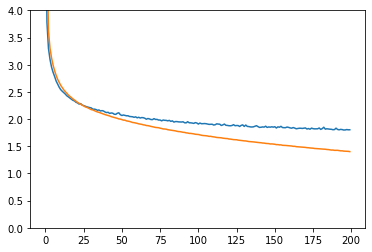

In [171]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 4);

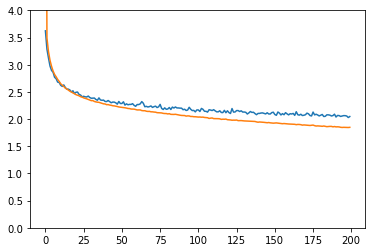

In [172]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

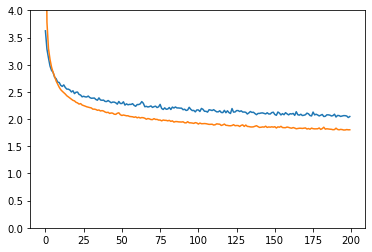

In [174]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(0, 4);

In [159]:
losses_pre_valid.mean(axis=0)[:25].min() / losses_rand_valid.mean(axis=0)[:25].min()

0.9440940909005326

In [204]:
losses_rand_valid.mean(axis=0)[-20:].mean() - losses_rand_valid.mean(axis=0)[120:140].mean()

-0.06591410146215404

In [205]:
losses_pre_valid.mean(axis=0)[-20:].mean() - losses_pre_valid.mean(axis=0)[120:140].mean()

-0.06120182791243978

(120.0, 200.0)

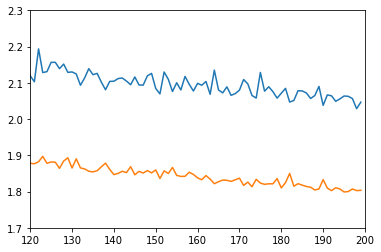

In [194]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 200)

In [178]:
# with open('./empty_pdb_ids.txt', 'w+') as f:
#     for line in list(empty_pdb_ids):
#         f.write(f"{line}\n")

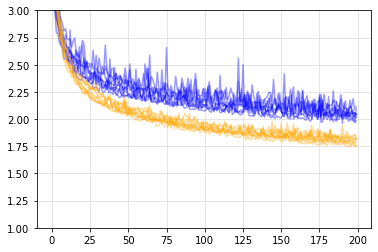

In [179]:
for loss in losses_rand_valid:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='orange', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

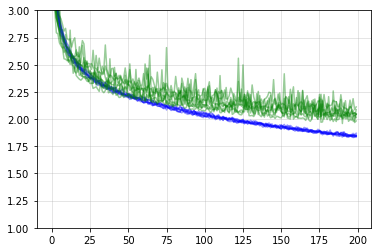

In [182]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

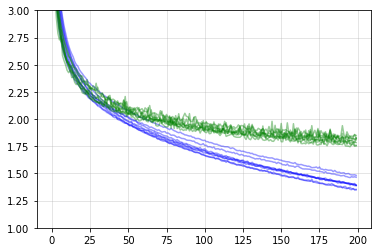

In [183]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

In [188]:
losses_pre_valid.min(axis=1).mean() / losses_rand_valid.min(axis=1).mean()

0.8871054421236413

In [189]:
losses_rand_valid.min(axis=1)

array([2.00902001, 2.02439084, 2.00867108, 2.02616371, 2.08328354,
       2.04676745, 1.95916425, 1.98175448])

In [186]:
losses_pre_valid.min() / losses_rand_valid.min()

0.8908960552341986

In [36]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.8762342086219417

In [196]:
data_casf = load_pdb_bind_filtered(filter_out_casf=False)

In [195]:
model_pres = [load_best_model(id_=i, kind='pre') for i in range(N_MODELS)]
model_rands = [load_best_model(id_=i, kind='rand') for i in range(N_MODELS)]

In [197]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [198]:
n_casf = len(data_casf)


In [199]:
testloader = get_data_loader(dataset=data_casf, batchsize=n_casf, shuffle=False)

In [200]:
output_pres = [get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]
output_rands = [get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]

In [201]:
output_pres = np.array(output_pres)
output_rands = np.array(output_rands)
output_pres_mean = output_pres.mean(axis=0)
output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

In [56]:
np.corrcoef(output_rands)

array([[1.        , 0.98378314, 0.9864989 , 0.98431085, 0.98332329,
        0.98609083, 0.98555935, 0.97936934],
       [0.98378314, 1.        , 0.98152614, 0.98280887, 0.9836083 ,
        0.98538489, 0.98686616, 0.98243616],
       [0.9864989 , 0.98152614, 1.        , 0.98129188, 0.98481569,
        0.98596477, 0.98406669, 0.98136575],
       [0.98431085, 0.98280887, 0.98129188, 1.        , 0.97868326,
        0.98578216, 0.98246211, 0.97626784],
       [0.98332329, 0.9836083 , 0.98481569, 0.97868326, 1.        ,
        0.98431483, 0.98414053, 0.98171628],
       [0.98609083, 0.98538489, 0.98596477, 0.98578216, 0.98431483,
        1.        , 0.98434666, 0.98260064],
       [0.98555935, 0.98686616, 0.98406669, 0.98246211, 0.98414053,
        0.98434666, 1.        , 0.98299802],
       [0.97936934, 0.98243616, 0.98136575, 0.97626784, 0.98171628,
        0.98260064, 0.98299802, 1.        ]])

In [212]:
np.triu(np.corrcoef(output_pres, dtype='float16'))

array([[0.9995, 0.9746, 0.9673, 0.964 , 0.968 , 0.9727, 0.964 , 0.974 ],
       [0.    , 1.    , 0.9756, 0.9727, 0.974 , 0.9756, 0.9805, 0.9775],
       [0.    , 0.    , 1.    , 0.9717, 0.97  , 0.9717, 0.9756, 0.974 ],
       [0.    , 0.    , 0.    , 1.    , 0.9673, 0.965 , 0.97  , 0.973 ],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.971 , 0.968 , 0.972 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.973 , 0.972 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995, 0.97  ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995]],
      dtype=float16)

In [213]:
np.triu(np.corrcoef(output_rands, dtype='float16'))

array([[1.    , 0.9897, 0.99  , 0.988 , 0.9873, 0.989 , 0.989 , 0.9883],
       [0.    , 0.9995, 0.99  , 0.99  , 0.99  , 0.99  , 0.99  , 0.991 ],
       [0.    , 0.    , 1.    , 0.991 , 0.9897, 0.99  , 0.989 , 0.9897],
       [0.    , 0.    , 0.    , 1.    , 0.9907, 0.9907, 0.9893, 0.991 ],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.99  , 0.9883, 0.9893],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9907, 0.9893],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9883],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995]],
      dtype=float16)

In [69]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)])

0.01423210160511057

In [70]:
get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

0.005367384624297422

In [208]:
get_corr(output_rands_mean, labels)

0.7705145096513552

In [209]:
get_corr(output_pres_mean, labels)

0.8284237794055219

In [211]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.05790926975416677

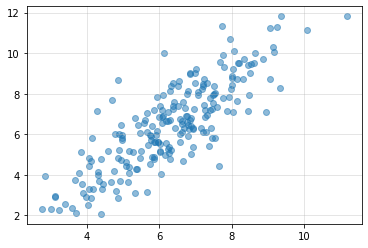

In [206]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

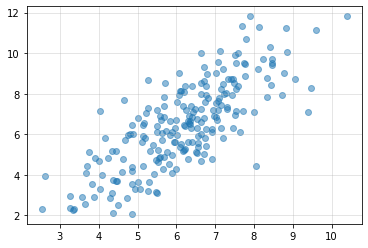

In [207]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);